# 의사결정나무(Decision Tree)
## 의사결정나무 모형
1. 일련의 독립변수들을 활용하여 분류를 하거나 예측을 수행하는 기법
2. 최종 결과물이 "일련의 규칙들"로 표현됨
3. Decision Trees 또는 Trees라고 불림

## 의사결정나무의 2가지 기본 아이디어
1. 반복적 분할(Recursive partitioning)
    1. 레코드들을 두 부분으로 반복해서 잘라 세분된 영역 내의 동질성이 최대가 되도록 함
    2. 계속 잘라나가다 보면 모든 학습용 데이터를 100% 정확하게 분류해낼 수 있음(세분화)
2. 가지치기(Pruning the tree)
    1. 반복적 분할을 반복하다 보면 과적합화 발생
    2. 과적합화를 해결하기 위해 불필요한 가지(정보 제공이 많지 않은 가지)를 제거함으로써 나무를 단순화하는 작업이 이루어짐
3. 단점 : 과적합화 문제
4. 과적합 해소 방법
    1. 가지치기(Pruning) : 적당한 수준에서 나무의 성장을 중단시킴
    2. 랜덤 포레스트 : 여러개의 의사결정나무 모델 중에서 최적의 모델 선택

### [실습] 의사결정나무 - Moons 데이터셋

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #noise: 표준편차

In [2]:
# 학습용, 테스트용 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [3]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
#모델 선언
model = DecisionTreeClassifier(random_state=2, max_depth=3, criterion='entropy')
#모델 학습
model.fit(X_train, y_train)

print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


[Text(0.4090909090909091, 0.875, 'X[1] <= 0.06\nentropy = 1.0\nsamples = 75\nvalue = [37, 38]'),
 Text(0.18181818181818182, 0.625, 'X[0] <= -0.617\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6363636363636364, 0.625, 'X[0] <= 1.166\nentropy = 0.855\nsamples = 50\nvalue = [36, 14]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= -0.15\nentropy = 0.601\nsamples = 41\nvalue = [35, 6]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= 1.672\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

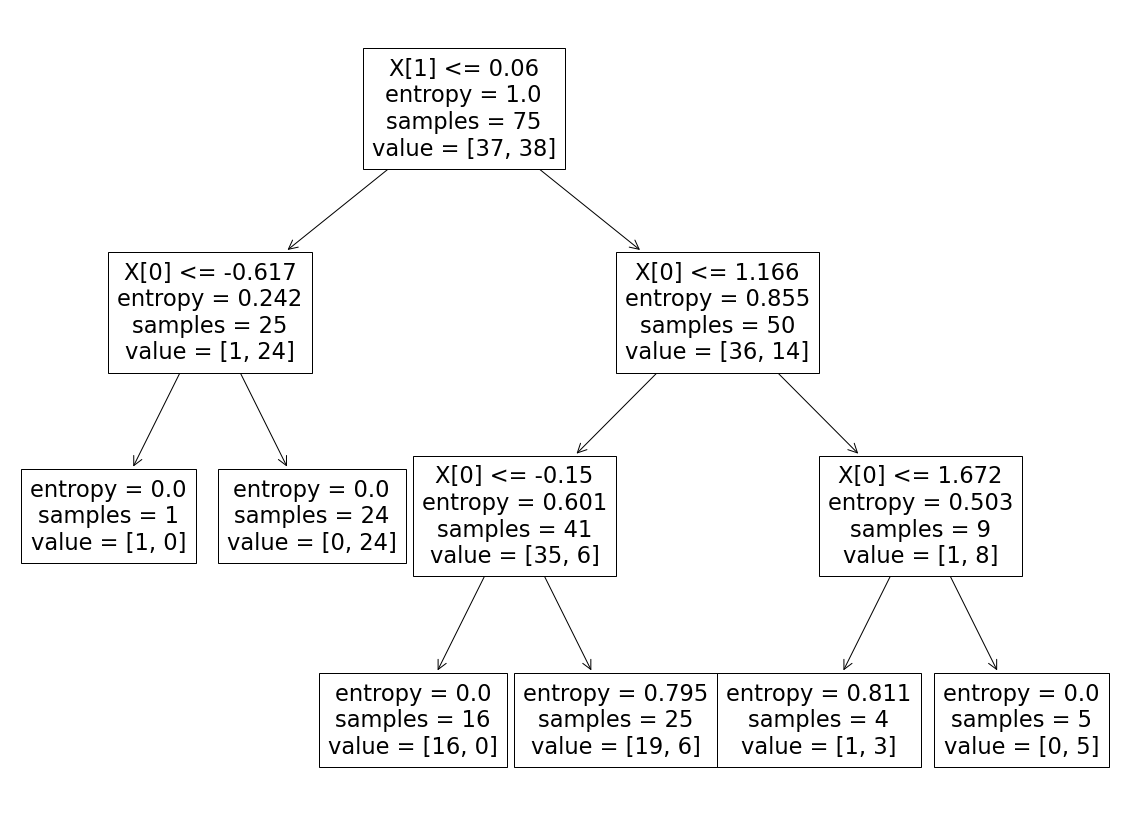

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model)

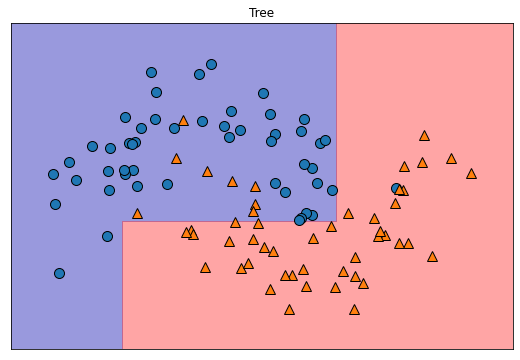

In [5]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
plt.title("Tree")

#class 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도
mglearn.discrete_scatter(X[:,0], X[:,1], y)

## Entroy & Gini
1. 엔트로피(Entropy)
    - 개념 : 랜덤 변수에 관한 정보를 계산하는 것을 '정보 엔트로피' 또는 '엔트로피'라고 함
    - 범위 : 0.0 ~ 1.0
    - 방식 : 각 사건의 확률에 관한 로그에 각 사건의 확률을 곱한 값의 합계의 음수
        - 엔트로피 0.0 (100% 순도) : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(불확실성 최소, 순도 최대)
        - 엔트로피 1.0 (불순도 100%) : 클래스별로 균등하게 분포(불확실성 최대, 순도 최소) 
2. 지니계수(Gini Index)
    - 개념 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표
    - 범위 : 0.0 ~ 0.5
    - 지니계수 0.0(100% 순도) : 지니계수가 작을수록 분류 잘된 것(불확실성 최소, 순도 최대)
    - 지니계수 0.5 : 클래스별로 균등하게 분포(불확실성 최대, 순도 최소)
    - 장점 : 로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 우수함
3. 확률과 정보량
    - 확률 : p
    - 정보량 : ceil(h) = ceil(-log2(p))
    - 확률 ⬆️ = 정보량 ⬇️

Text(0, 0.5, 'Information')

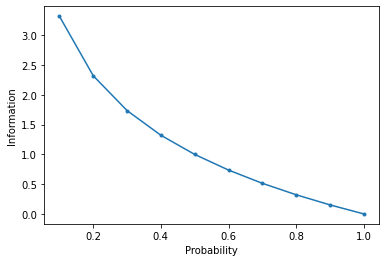

In [6]:
# 확률과 엔트로피
import numpy as np
from math import log2
from matplotlib import pyplot as plt

# 확률
probs = np.arange(0.1, 1.1, 0.1)
# 정보량 계산
info = [-log2(p) for p in probs]

plt.plot(probs, info, marker='.')
plt.xlabel('Probability')
plt.ylabel('Information')

In [7]:
# 주사위 던지기 엔트로피 계산
from math import log2

#경우의 수
n = 6

# 확률
p = 1.0 / n

# 엔트로피 공식
entropy = -sum([p * log2(p) for _ in range(n)])

print(entropy) #비트

2.584962500721156


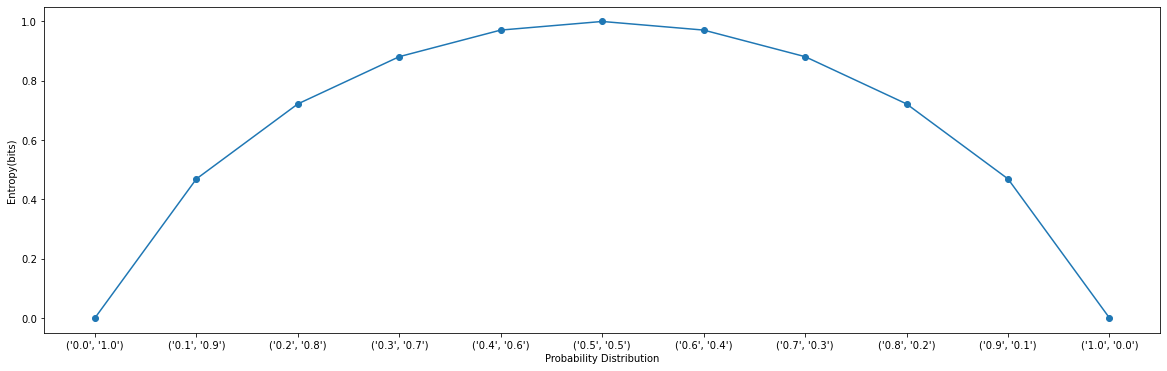

In [8]:
# 엔트로피
from math import log2
import matplotlib.pyplot as plt 

def entropy(events):
    return -sum([p*log2(p+ 1e-15) for p in events])

# 확률
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 확률분포
dists = [[p, 1-p] for p in probs]
# 각 분포에 관한 엔트로피 계산
ents = [entropy(d) for d in dists]
# 확률분포와 엔트로피 그래프
plt.figure(figsize=(20, 6))
plt.plot(probs, ents, marker='o')

xnum=[]
for d in dists:
    dd = (str(d[0]), '{:.1f}'.format(d[1]))
    xnum.append(dd)

plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()

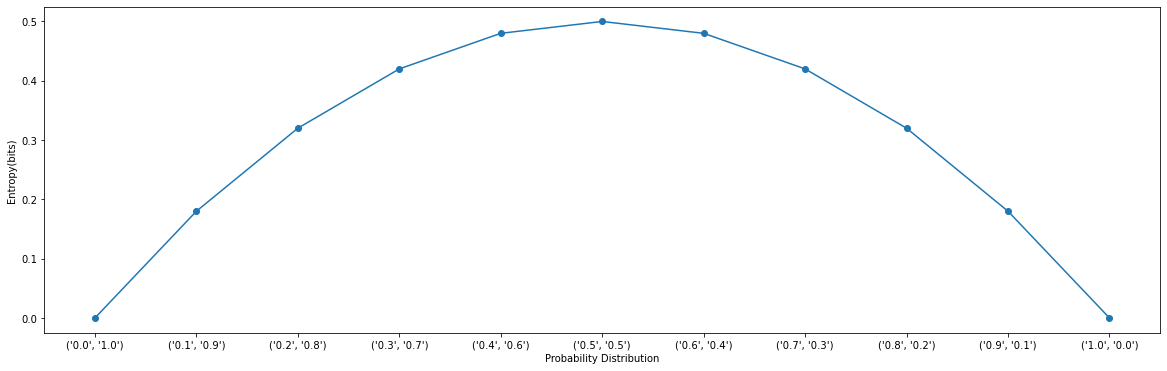

In [9]:
# 지니계수
%matplotlib inline
from math import log2
from matplotlib import pyplot

def gini2(events):
    return sum([p * (1-p) for p in events])

# 확률
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 확률분포
dists = [[p, 1-p] for p in probs]
# 각 분포에 관한 엔트로피 계산
ents = [gini2(d) for d in dists]
# 확률분포와 엔트로피 그래프
plt.figure(figsize=(20, 6))
plt.plot(probs, ents, marker='o')

xnum=[]
for d in dists:
    dd = (str(d[0]), '{:.1f}'.format(d[1]))
    xnum.append(dd)

plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()


### 랜덤포레스트 지표
- splitter
    - 각 노드에서 분할을 선택하는데 사용된 전략
    - splitter='best'
        * 최상의 분할을 선택하는 방식 (for 랜덤포레스트)
    - splitter='random'
        * 무작위 분할을 선택하는 방식 (for 엑스트라트리)

- ccp_alpha
    - 가지치기하는 노드수, 즉 **가지치기 양**을 조정하는 옵션
    - ccp_alpha ⬆️ => 가지치기하는 node ⬆️ => node 개수 ⬇️
    - ccp_alpha = 0 일 경우 => 과적합 발생
    - 가지치기 경로 정보를 제공해줌
        * Ex) 
            - `path = DecisionTreeModel.cost_complexity_pruning_path(X_train, y_train)`
            - `ccp_alphas, impurities = path.ccp_alphas, path.impurities` #impurities : 노드의 불순도
            - `plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o'` #마지막 값은 전체 트리를 가지치기해 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력

- max_leaf_nodes
    - max_leaf_nodes : leaf node(최종 노드, 자식 노드가 없는 노드)의 최대 개수
    - min_samples_leaf : leaf node가 되기 위한 최소한의 샘플 개수
    - min_samples_leaf : 노드가 분기할 수 있는 최소 샘플 개수
    - Ex)
        - `model = DecisionTreeClassifier(max_leaf_noeds=3, random_state=0)`
        - ` from sklearn import tree `
            ` tree.plot_tree(model)` #트리 시각화
        - ` from sklearn.tree import export_text ` 
            `tree_rules = export_text(model, feature_names = list(X_train.columns))` #의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
            `print(tree_rules`
    - tree_ : 트리의 루트 노드
        - `n_nodes = model.tree_node_count` #노드 개수
        - `threshold = model.tree_.threshold` #노드의 임계값

- min_samples_split
    - 노드가 분기할 수 있는 최소 샘플 개수

In [10]:
#의사결정나무 모형 생성
from sklearn.tree import DecisionTreeClassifier

#트리 모형 생성(기본옵션)
model1 = DecisionTreeClassifier(splitter='best', random_state=0)
model1.fit(X_train, y_train)

#예측하기
pred = model1.predict(X_test)

#성능 확인
print("학습용:", model1.score(X_train, y_train))
print("검증용:", model1.score(X_test, y_test))


학습용: 1.0
검증용: 0.88


In [11]:
# 무작위 분할을 선택하는 방식
#트리 모형 생성 (무작위)
model2 = DecisionTreeClassifier(splitter='random', random_state=0)

#예측하기
model2.fit(X_train, y_train)

#성능 확인
print("학습용:", model2.score(X_train, y_train))
print("검증용:", model2.score(X_test, y_test))

학습용: 1.0
검증용: 0.8


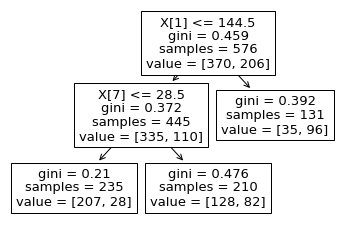

In [12]:
import pandas as pd
df = pd.read_csv('datasets/diabetes.csv')
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model.fit(X_train, y_train)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model)
plt.show()

In [13]:
from sklearn.tree import export_text
#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- Glucose <= 144.50
|   |--- Age <= 28.50
|   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- class: 0
|--- Glucose >  144.50
|   |--- class: 1



In [14]:
n_nodes = model.tree_.node_count
print("노드 개수:", n_nodes)
threshold = model.tree_.threshold
print("노드의 임계값:", threshold)

노드 개수: 5
노드의 임계값: [144.5  28.5  -2.   -2.   -2. ]


### 민감도 & 특이도
- 민감도(TPR, True Positive Rate)
    * **1을 1로 잘 맞춘** 비율, 재현율(recall) 이라고도 함
- 특이도(FPR, False Positive Rate)
    * 실제값 **0을 1로 잘못 예측**한 비율, 위양성율(fall-out)이라고도 함
    * 특이도 ⬇️ => 좋은 모형
    * Ex) 코로나 음성인 사람을 코로나 양성으로 오진한 경우
- 민감도와 특이도는 일반적으로, 양의 상관관계
    * True로 판단하는 기준(Threshold) ⬇️ => 민감도 ⬆️ => False를 True로 판단하는 샘플 ⬆️ => 특이도 ⬆️
    * ROC(receiver Operator Characteristic) curve
        - 클래스 **판별 기준값의 변화**에 따른 **민감도와 특이도의 변화**를 시각화한 것
        - 판별함수의 판별 기준값이 달라질 때 판별 결과가 어떻게 달라지는지를 표현한 그래프



In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=10)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f","y_hat","y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

#0을 기준으로 계산한 결과
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat, labels=[0,1])
# 윗줄 FPR, 아랫줄 TPR
# array([[7, 1],
#        [1, 7]])

#0을 기준으로 계산한 결과
fpr0 = 7 /(7 + 1)
tpr0 = 1 / (1 + 7)
print(fpr0)
print(tpr0)

0.875
0.125


In [16]:
#판별함수 출력값에 따라 판별 기준을 바꿔 계산한 fpr, tpr
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y, model.decision_function(X))
fpr, tpr, threshold

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))

In [17]:
#판별함수가 제공되지 않는 모형은 predict_proba() 함수를 사용할 수 있음
fpr, tpr, threshold = roc_curve(y, model.predict_proba(X)[:,1])
fpr, tpr, threshold

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

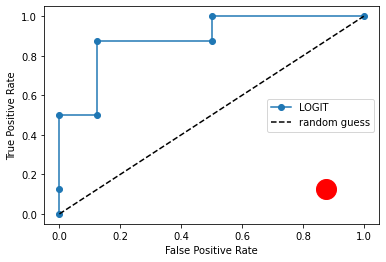

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="LOGIT")
plt.plot([0,1],[0,1], 'k--', label="random guess")
plt.plot([fpr0], [tpr0], 'ro', ms=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ROC와 AUC
- ROC 
    * Threshold 변화에 대한 TPR과 FPR
        * TPR(True Positive Rate, 민감도) : 1을 1로 잘 맞춘 비율, y축
        * FPR(False Positive Rate, 민감도) : 0을 1로 틀린 비율, x축
        * fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
        * fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))
        * 면적 (0.5 ~ 1.0)이 1에 가까울수록 (왼쪽 위 꼭지점에 다가갈수록) 좋은 모형
- AUC(Area Under the Curve)
    * ROC 커브의 면적
    * 0.5 ~ 1.0
    * 1에 가까울수록 좋은 모형

In [19]:
import pandas as pd
df = pd.read_csv('datasets/diabetes.csv')
train_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[train_cols]
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Outcome'])
df2 = pd.concat([X_samp, y_samp], axis=1)

df2['Outcome'].value_counts()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=0)

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)

print("학습용:", model1.score(X_train, y_train))
print("검증용:", model1.score(X_test, y_test))

학습용: 0.7785016286644951
검증용: 0.7792207792207793


In [20]:
#판별함수 : 음수이면 0, 양수이면 1 => 0이 판별기준
model1.decision_function(X_test)

array([-3.94684976, -3.19996369, -3.28379072, -0.32298561,  0.73900873,
       -2.99368344,  1.30395857, -3.43574253, -2.22053915, -1.04306095,
       -1.39239751, -2.37001707, -2.41187757, -1.66739357, -0.30761972,
       -2.55605999, -0.03124206, -0.66566701, -1.05356487,  1.88278377,
       -1.95369101, -0.7739427 ,  0.49152143,  0.53272192,  0.03479952,
        0.18967221,  1.0973682 , -2.23322413, -2.59468471, -1.98144274,
       -0.39717164, -1.90862157,  0.84496439, -0.6958154 ,  2.4694876 ,
       -2.15470519,  0.5509269 , -0.89219237, -1.53769556, -0.85313319,
       -2.21687897, -2.72202406,  1.07137577, -2.16481458,  0.58805251,
        0.89865746, -2.10295348, -1.50689648,  0.64890981, -1.9847487 ,
       -1.87484911, -0.26095328, -1.22855196,  1.19058036, -0.39677027,
        1.45514939, -1.73530798, -1.76990113, -3.27832381, -2.15904734,
       -0.94225458, -1.14575056,  1.27353285, -0.73248863, -2.77495049,
       -0.71051007, -1.20843204, -1.29096276, -1.30436029, -0.50

In [21]:
# 서포트 벡터머신 (분류) 모델 사용
from sklearn.svm import SVC
model2 = SVC(random_state=0)
model2.fit(X_train, y_train)

print("학습용:", model2.score(X_train, y_train))
print("검증용:", model2.score(X_test, y_test))


학습용: 0.7687296416938111
검증용: 0.7662337662337663


In [22]:
model2.decision_function(X_test)

array([-1.82932415, -1.73182099, -1.66592723, -1.17840177,  0.07043732,
       -1.51261292, -0.50338999, -1.62464759, -1.51183804, -0.79995812,
       -0.68680832, -1.43663562, -1.17114762, -0.78061173, -0.42598534,
       -1.64641614, -1.04524908, -1.16094503, -1.03800185,  0.93565507,
        0.21837452, -1.06307718, -0.37664922,  0.13670031, -0.07801026,
       -0.41215787,  0.84935086, -1.40404526, -1.35255714, -1.71138261,
       -0.37801801, -1.37295736,  1.05651518, -0.73070221,  1.01049666,
       -1.02303192,  0.81090537, -0.29245555, -1.12510763, -0.12967306,
       -1.59462407, -1.70736713,  1.14833713, -1.41643481,  0.56034289,
        0.40642512, -1.43147648, -1.05447224,  0.08047596, -1.51922694,
       -1.20611364, -0.97792314, -1.24495957,  1.17100673, -0.86675621,
        0.538289  , -1.18941487, -1.18818004, -1.7806223 , -1.16922474,
       -0.93850958, -0.75190112,  0.76983048, -0.97510215, -1.52359387,
       -0.8107215 , -1.25146417, -0.69053732, -1.05332699, -0.91

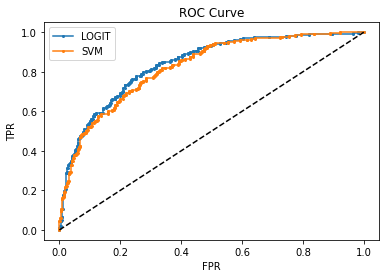

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
#TPR(True Positive Rate, 민감도) : 1을 1로 잘 맞춘 비율, y축
#FPR(False Positive Rate, 민감도) : 0을 1로 틀린 비율, x축
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

#면적 (0.5 ~ 1.0)이 1에 가까울수록 (왼쪽 위 꼭지점에 다가갈수록) 좋은 모형
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0,1],[0,1], 'k--', label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [24]:
# AUC
from sklearn.metrics import auc 
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.8387537313432836, 0.8243432835820896)

### 다중클래스의 ROC
- roc_curve()는 이진분류만 지원
- 각각의 클래스에 대해 별도로 roc curve를 그려야 함

### min_samples_split
- refit = 'AUC' : 추정값을 교차검증한 AUC 점수가 가장 좋은 매개변수
- make_scorer() : 사용자정의 평가함수를 지정하는 함수

[0.68427324 0.73324354 0.76396296 0.77676834 0.78944235 0.78680154
 0.79156883 0.79634172 0.79734556 0.80109574 0.79870755 0.79870755
 0.79754088 0.7982673  0.80199301 0.79594444 0.78316667 0.77030294
 0.76592558 0.76592558 0.76592558 0.76117365 0.75559713 0.75400594
 0.75400594 0.74200035 0.74200035 0.74200035 0.7377362  0.7377362
 0.7377362  0.7377362  0.7377362  0.7377362  0.73290287 0.73290287
 0.73290287 0.73290287 0.73290287 0.70984207 0.70984207]
[0.71630592 0.72409812 0.71751974 0.7188439  0.73185638 0.73056617
 0.73966556 0.74358713 0.73967405 0.74618453 0.73966556 0.73966556
 0.73966556 0.74096426 0.73312962 0.73705118 0.73575248 0.74484339
 0.74092182 0.74092182 0.74092182 0.73311264 0.73181394 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152]


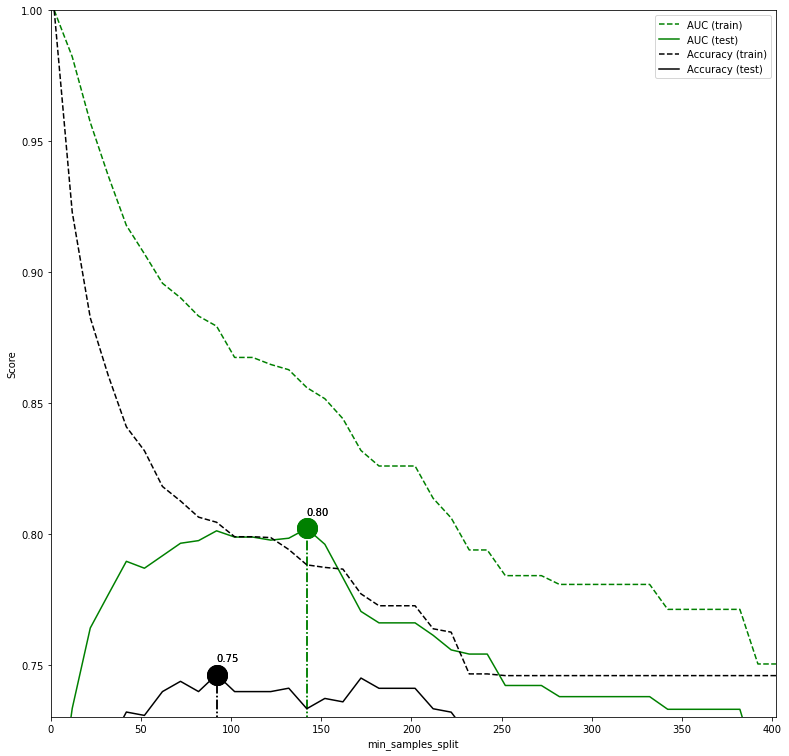

In [25]:
import pandas as pd
df = pd.read_csv('datasets/diabetes.csv')
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'min_samples_split':range(2, 403, 10)}, scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

print(results['mean_test_AUC'])
print(results['mean_test_Accuracy'])

%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np

plt.figure(figsize=(13, 13))
plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca() #current axes 반환
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

#min_samples_split의 값
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)
for scorer, color in zip(sorted(scoring), ['g','k']):
    for sample, style in (('train', '--'), ('test','-')):
        sample_score_mean = results['mean_%s_%s'%(sample, scorer)]
        ax.plot(X_axis, sample_score_mean, style, color=color, label="%s (%s)"%(scorer, sample))
        best_index = np.argmax(results['mean_test_%s'%scorer])
        best_score = results["mean_test_%s"%scorer][best_index]
        
        #최고 점수에 수직선 표시
        ax.plot([X_axis[best_index], ]*2, [0, best_score], linestyle='-.', color= color, marker='o', ms=20)
        # 최고 점수 표시
        ax.annotate("%0.2f"%best_score, (X_axis[best_index], best_score + 0.005))

plt.legend()
plt.grid(False)
plt.show()

### 회귀트리
- 의사결정나무회귀
    * 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력 X => 시계열 분석, 순환 신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함

/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Text(0, 0.5, 'price ($/Mbyte)')

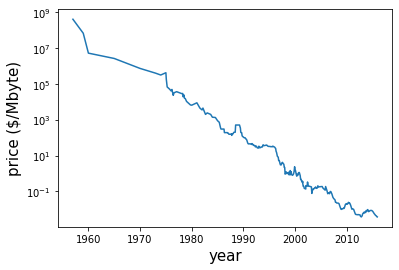

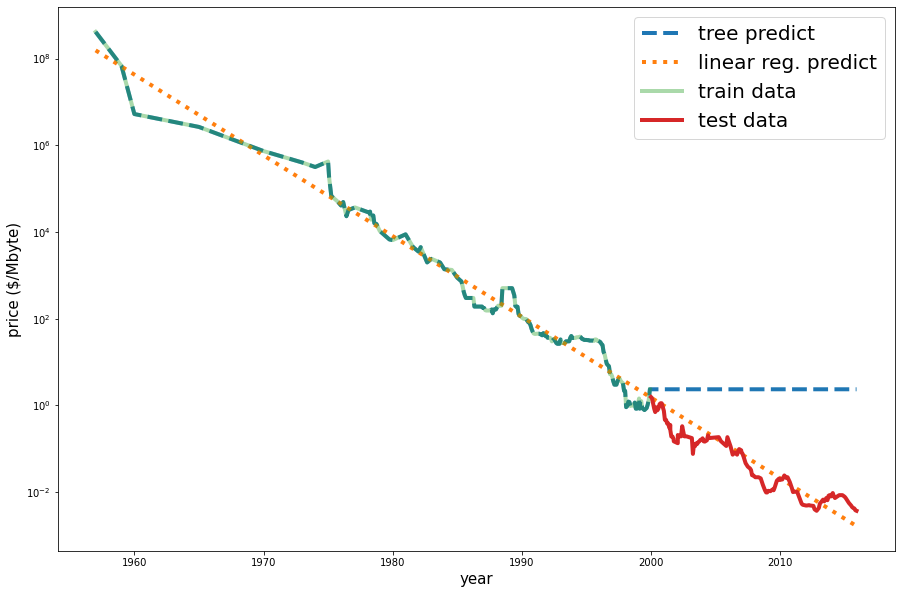

In [26]:
import pandas as pd

df = pd.read_csv('datasets/ram_price.csv')
df.head()

%matplotlib inline
import matplotlib.pyplot as plt

plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

#학습용과 검증용 구분
X_train0 = df[df['date'] < 2000]
X_test = df[df['date'] >= 2000]

#기계학습모형에는 2차원 형태의 데이터 입력
X_train = X_train0['date'][:, None]
y_train = np.log(X_train0['price'])

# 의사결정회귀
tree = DecisionTreeRegressor().fit(X_train, y_train)
# 선형회귀
lr = LinearRegression().fit(X_train, y_train)

#전체기간의 자료
x_all = np.array(df['date']).reshape(-1, 1)
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree)

pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr)

#실제값과 의사결정회귀, 선형회귀 예측값 비교
plt.figure(figsize=(15, 10))
plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls=':')
plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test['date'], X_test['price'], label='test data', lw='4')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)